In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from copy import copy
from pathlib import Path
import pickle
import os


In [2]:
with open("gaussfit_9-22.pkl",'rb') as pickle_file:
    result = pickle.load(pickle_file)

In [ ]:
##### circle ######
with open("gaussfit_circle_9-25.pkl",'rb') as pickle_file:
    result = pickle.load(pickle_file)

In [3]:
image_directory= r"/scratch/ajo5182/psfSamples/image_reconstruction"
reconstruction_list = sorted([file for file in os.listdir(image_directory) if os.path.isfile(os.path.join(image_directory, file))])


In [4]:
fit_data = result[0]
cov_data = np.array(result[1])

In [5]:
xSigma=np.array([None]*len(fit_data.values))
ySigma=np.array([None]*len(fit_data.values))
xCenter=np.array([None]*len(fit_data.values))
yCenter = np.array([None]*len(fit_data.values))
peakSig = np.array([None]*len(fit_data.values))
theta = np.array([None]*len(fit_data.values))

for a in range(len(fit_data.values)):
    xSigma[a] = np.array(fit_data[a]['xSigma'])
    ySigma[a] = np.array(fit_data[a]['ySigma'])
    xCenter[a] = np.array(fit_data[a]['xCenter'] )
    yCenter[a] = np.array(fit_data[a]['yCenter'])
    peakSig[a] = np.array(fit_data[a]['peakSig'])
    theta[a] = np.array(fit_data[a]['theta'])
    



In [21]:
theta = theta[peakSig != np.array(None)]
xSigma = xSigma[peakSig != np.array(None)]
ySigma = ySigma[peakSig != np.array(None)]
cov_data = cov_data[peakSig!= np.array(None)]
peakSig = peakSig[peakSig != np.array(None)]

In [6]:
xfwhm = 2.355*xSigma
yfwhm = 2.355*ySigma

In [ ]:
localizationX = xfwhm/peakSig
localizationY = yfwhm/peakSig

In [25]:
cov_data[3]

array([[ 1.08142031e+57,  2.17174738e+56, -2.94916635e+50,
         1.09030437e+55],
       [ 2.17174738e+56,  4.36143958e+55, -3.82656594e+48,
         2.18964627e+54],
       [-2.94916635e+50, -3.82656594e+48,  1.85988013e+50,
        -1.50865545e+47],
       [ 1.09030437e+55,  2.18964627e+54, -1.50865545e+47,
         1.09931906e+53]])

In [7]:
aError = [np.nan]*len(cov_data)
xMean_error = [np.nan]*len(cov_data)
yMean_error = [np.nan]*len(cov_data)
xSigma_error = [np.nan]*len(cov_data)
ySigma_error = [np.nan]*len(cov_data)
angle_error = [np.nan]*len(cov_data)

for q in range(len(cov_data)):
        aError[q], xMean_error[q], yMean_error[q], xSigma_error[q],ySigma_error[q],angle_error[q] = np.sqrt(np.diag(cov_data[q]))

In [13]:
xfwhm_error = np.array(xSigma_error)*2.355
yfwhm_error = np.array(ySigma_error)*2.355

Text(0.5, 1.0, 'Reconstructed Source Locations')

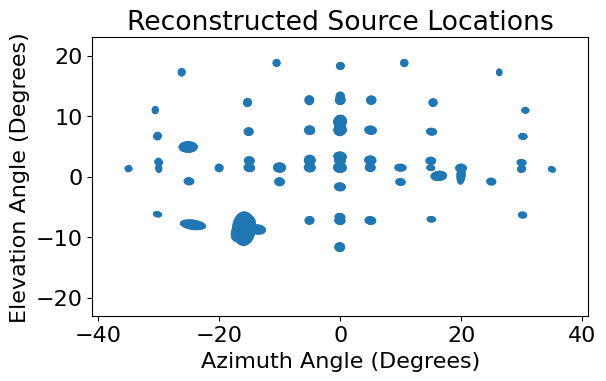

In [20]:
mag = 10 # increase fwhm so its easier to see

ells =  [Ellipse(xy= (1*xCenter[i],1*yCenter[i]),width=mag*xfwhm[i],height=mag*yfwhm[i], angle= mag*theta[i]) for i in range(len(xfwhm))]
i = 0
fig, ax = plt.subplots()
ax.set(xlim=(-41, 41), ylim=(-23,23 ), aspect="equal")
#ax.set(xlim=(-23, -19), ylim=(0,3 ), aspect="equal")
#ax.add_patch(ells[8])
#xerror = xSigma_error[8]+xSigma[8]
#yerror = ySigma_error[8]+ySigma[8]
#ax.errorbar(xCenter[8], yCenter[8], xerr=xerror, yerr=yerror,
#               fmt='o', color='red', capsize=.1, zorder=2)

for e in ells[0:161]:
    #print(i)
    #ax.legend(e,run_name)
    #ax.add_artist(e)
    ax.add_patch(e)
    #e.set(clip_box=ax.bbox, alpha=1,  label=run_name[i]) #facecolor=np.random.rand(3),
    i = i+1
plt.rcParams['font.size'] = '16'
plt.xlabel('Azimuth Angle (Degrees)')
plt.ylabel('Elevation Angle (Degrees)')
plt.title('Reconstructed Source Locations')


In [35]:
print(xSigma_error[8])
print(xSigma[8])

0.003364535273239553
0.05031593418422835


<ErrorbarContainer object of 3 artists>

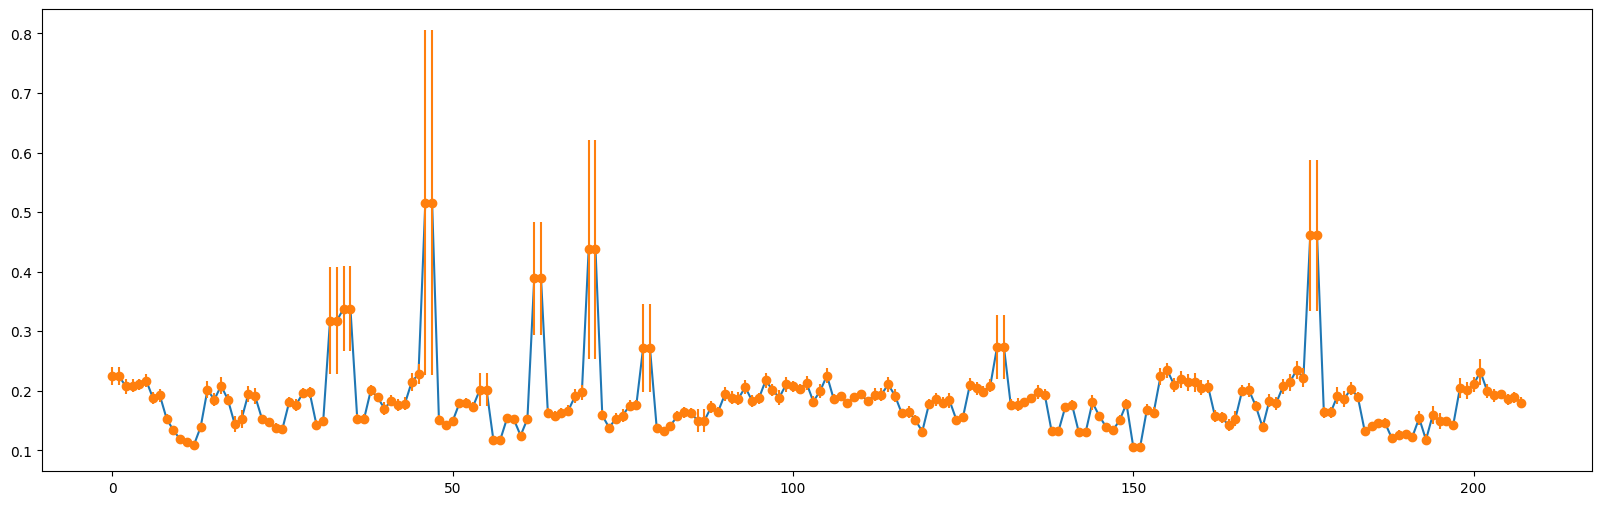

In [18]:
plt.figure(figsize=(20, 6))

plt.plot(range(len(xfwhm)),xfwhm)
plt.errorbar(range(len(xfwhm)),xfwhm,yerr=xfwhm_error,fmt = 'o')


<ErrorbarContainer object of 3 artists>

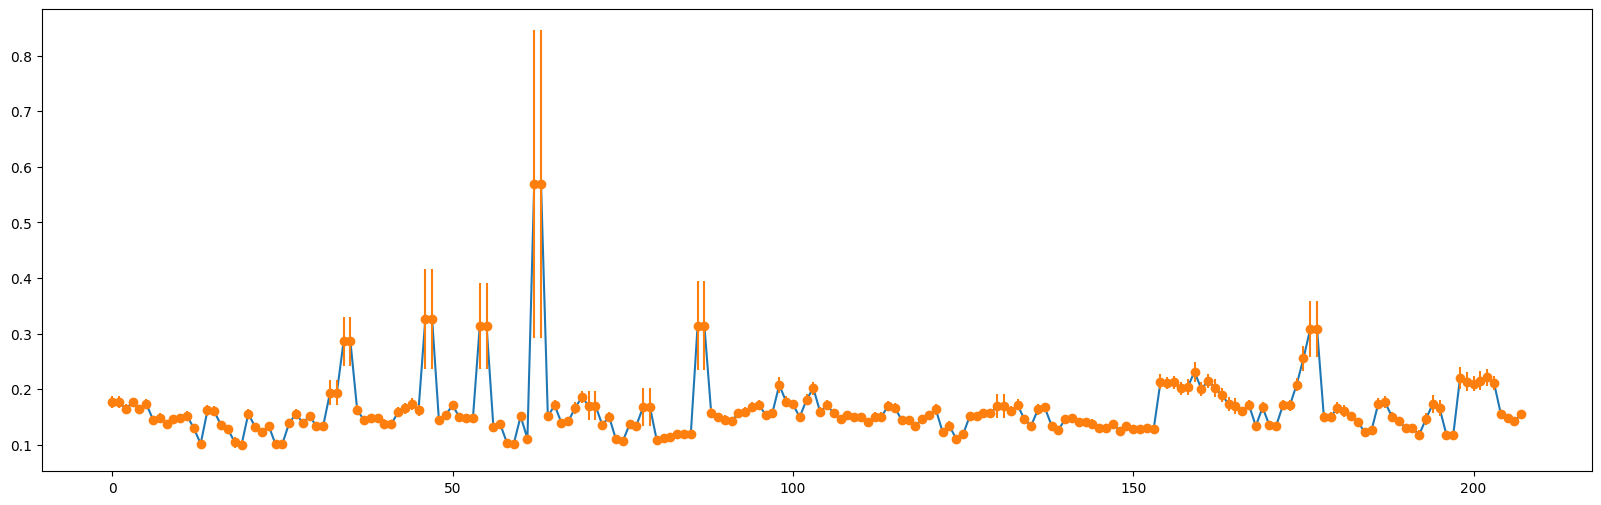

In [14]:
plt.figure(figsize=(20, 6))

plt.plot(range(len(yfwhm)),yfwhm)
plt.errorbar(range(len(yfwhm)),yfwhm,yerr=yfwhm_error,fmt = 'o')

<ErrorbarContainer object of 3 artists>

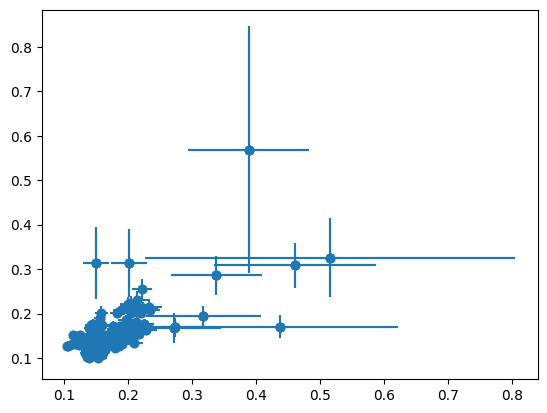

In [16]:
plt.scatter(xfwhm,yfwhm)
plt.errorbar(xfwhm,yfwhm,xerr=xfwhm_error,yerr=yfwhm_error,fmt = 'o')

In [21]:
centroidX = np.mean(xfwhm)
centroidY= np.mean(yfwhm)
#dist = np.sqrt((centroidX-xCoord)**2+(centroidY-yCoord)**2)

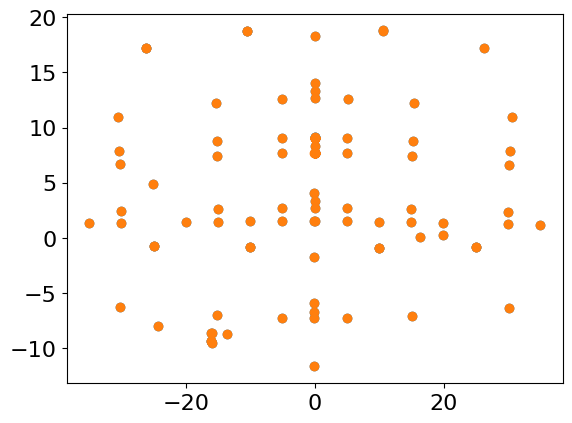

In [ ]:
xCenter1 = xCenter[::2]
xCenter2 = xCenter[1::2]

yCenter1 = yCenter[::2]
yCenter2 = yCenter[1::2]

plt.scatter(xCenter1,yCenter1)


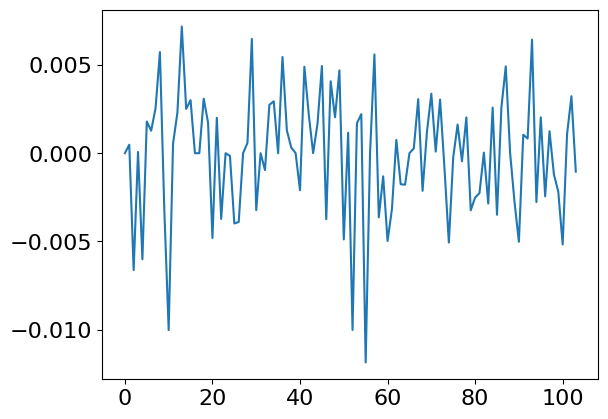

In [27]:
plt.plot(xCenter1-xCenter2)